<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Multiple Control Constructions with ProjectQ </b></font>
<br>

_prepared by Maksim Dimitrijev and Abuzer Yakaryilmaz_

_ProjectQ adaptation by Vishal Sharathchandra Bajpe and Marija Šćekić_
<br><br>

Remember that when appying CNOT gate, NOT operator is applied to the target qubit if the control qubit is in state $\ket{1}$:

$$ CNOT= \mymatrix{cc|cc}{\blackbit{1} & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1} \\  0 & 0 & \bluebit{1} & 0} . $$

How can we obtain the following operator, in which the NOT operator is applied to the target qubit if the control qubit is in state $ \ket{0} $?

$$ C_0NOT = \mymatrix{cc|cc}{0 & \bluebit{1} & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 \\  0 & 0 & 0 & \blackbit{1}} . $$

As also mentioned in the notebook [Operators on Multiple Bits](../classical-systems/CS40_Operators_on_Multiple_Bits.ipynb), we can apply a $ NOT $ operator on the control bit before applying $ CNOT $ operator so that the $ NOT $ operator is applied to the target qubit when the control qubit has been in state $ \ket{0} $. To recover the previous value of the control qubit, we apply the $ NOT $ operator once more after the $ CNOT $ operator. In short:
<ul>
    <li>apply $ NOT $ operator to the control qubit,</li>
    <li>apply $ CNOT $ operator, and,</li>
    <li>apply $ NOT $ operator to the control qubit.</li>
</ul>

We can implement this idea in ProjectQ as follows.

CNOT(0) = 
0.0  1.0  0.0  0.0  
1.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  
0.0  0.0  0.0  1.0  


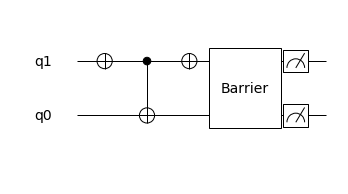

In [3]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, UnitarySimulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = UnitarySimulator(), engine_list = [qdrawer]+get_engine_list())

# Define number of qubits and allocate them
qubits = qengine.allocate_qureg(2)


# Apply X gate to qubit[1]
X | qubits[1]

# Apply CNOT with qubit[1] as control and qubit[0] as target
C(NOT) | (qubits[1], qubits[0])

# Apply X gate to  qubit[1]
X | qubits[1]

# Flush engine
qengine.flush()

# Define a barrier
Barrier | qubits

# Measure Qubits
All(Measure)| qubits

# Draw Circuit
qdrawer.draw(qubit_labels={0:'q0',1:'q1'},drawing_order={0:0,1:1})

# read unitary
circuit_unitary = qengine.backend.unitary

print("CNOT(0) = ")
for row in circuit_unitary:
    column_val = ""
    for value in row:
        column_val = column_val + str(round(value.real,10)) + "  "
    print(column_val)

By using this trick, more complex conditional operators can be implemented.

<h3>CCNOT</h3>

Now we introduce $ CCNOT $ gate: **controlled-controlled-not operator** ([Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate)), which is controlled by two qubits. The implementation of $CCNOT$ gate in ProjectQ is as follows:

    C(X, 2) | (ctrl1, ctrl2, tgt) 

That is, $ NOT $ operator is applied to the target qubit when both control qubits are in state $\ket{1}$. Its matrix representation is as follows:

$$ CCNOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} \\ 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0}. $$

<h3>Task 1</h3>

Implement each of the following operators in ProjectQ by using three qubits. Verify your implementation by using "UnitarySimulator" backend. <br><br>

<font size="-2">
$$
    C_0C_0NOT = \mymatrix{cc|cc|cc|cc}{0 & \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~
    C_0C_1NOT = \mymatrix{cc|cc|cc|cc}{ \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 \\ 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~ \mbox{and} ~~
    C_1C_0NOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 \\ 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}.   
$$
    </font>

In [ ]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT
from projectq.backends import CircuitDrawerMatplotlib, UnitarySimulator
from projectq.setups.default import get_engine_list

######################
# Enter your code here
######################


<a href="Q80_Multiple_Control_Constructions_Solutions_ProjectQ.ipynb#task1">click for our solution</a>

<h3>More controls</h3>

Here we present basic methods on how to implement $ NOT $ gates controlled by more than two qubits by using $CNOT$, $ CCNOT $, and some ancilla (auxiliary) qubits. 

*Note that ProjectQ has a method called "ControlledGate" to apply such gatess.* 
<br>
*You can control any gate in ProjectQ conviniently using the ControlledGate operation.*

#### Implementation of CCCNOT gate

We give the implementation of $ CCCNOT $ gate: $NOT$ operator is applied to target qubit when the control qubits are in state $ \ket{111} $. This gate requires 4 qubits. We also use an auxiliary qubit. 

Our qubits are $ q_{aux}, q_3, q_2, q_1, q_0 $, and the auxiliary qubit $q_{aux}$ should be in state $\ket{0}$ after each use. 

The implementation of the $ CCCNOT $ gate in ProjectQ is given below. The short explanations are given as comments.

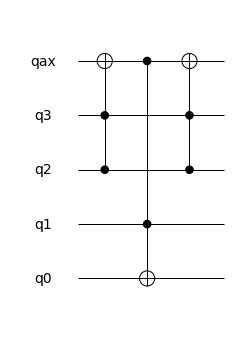

In [42]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define number of qubits and allocate them
qubits = qengine.allocate_qureg(4)
qaux = qengine.allocate_qureg(1)

# Step 1: set qaux to |1> if both q3 and q2 are in |1>
C(NOT,2) | (qubits[3], qubits[2], qaux[0])

# Step 2: apply NOT gate to q0 if both qaux and q1 are in |1>
C(NOT,2) | (qaux[0], qubits[1], qubits[0])

# Step 3: set qaux to |0> if both q3 and q2 are in |1> by reversing the affect of step 1
C(NOT,2) | (qubits[3], qubits[2], qaux[0])

# Draw Circuit
qlabels={} # the labels of qubits
qorder={} # the orders of qubits
# str(qubit) gives the ID of the qubit, 
# and so int(str(qubit)) gives the ID as integer
# our quantum registers are qubits & qreg and so their ID are expected to be 0,1,2,3 & 4
for q in qubits:
    qID = int(str(q))
    qlabels[qID] = "q"+str(q)
    qorder[qID]=qID
for q in qaux:
    qID = int(str(q))
    qlabels[qID] = "qax"
    qorder[qID]=qID

#print(qlabels)
#print(qorder)

# draw the circuit
qdrawer.draw(qubit_labels=qlabels,drawing_order=qorder)

# Measure each quantum register before leaving the program
All(Measure) | qubits
Measure | qaux

Now, we execute this circuit on every possible inputs and verify the correctness of the implementation experimentally.

In [55]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Set all Inputs
all_inputs=[]
for q3 in ['0','1']:
    for q2 in ['0','1']:
        for q1 in ['0','1']:
            for q0 in ['0','1']:
                all_inputs.append(q3+q2+q1+q0)
# print(all_inputs)     

print("input ==> output (without auxilary qubit)")
for _input in all_inputs:
    
    # Initialize engine objects for simulation and drawings
    qdrawer = CircuitDrawerMatplotlib()
    qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

    # Define number of qubits and allocate them
    qubits = qengine.allocate_qureg(4)
    qaux = qengine.allocate_qureg(1)
    
    # Set the initial value of the circuit w.r.t. the input 
    # Remark that each input b = b3b2b1b0, so the indices of _input and the indices of qubits are reversed
    if _input[0] =='1': X | qubits[3]
    if _input[1] =='1': X | qubits[2]
    if _input[2] =='1': X | qubits[1]
    if _input[3] =='1': X | qubits[0]
    
    # Step 1: set qaux to |1> if both q3 and q2 are in |1>
    C(NOT,2) | (qubits[3], qubits[2], qaux[0])
    # Step 2: apply NOT gate to q0 if both qaux and q1 are in |1>
    C(NOT,2) | (qaux[0], qubits[1], qubits[0])
    # Step 3: set qaux to |0> if both q3 and q2 are in |1> by reversing the affect of step 1
    C(NOT,2) | (qubits[3], qubits[2], qaux[0])
    
    # Flush Engine
    qengine.flush()
    
    # Measure all qubits
    All(Measure) | qubits
    output = ""
    for q in qubits:
        output = str((int(q))) + output    
    if _input == output: print(_input,"==>",output," (no change)")
    else: print(_input,"==>",output," (NOT is activated)")

input ==> output (without auxilary qubit)
0000 ==> 0000  (no change)
0001 ==> 0001  (no change)
0010 ==> 0010  (no change)
0011 ==> 0011  (no change)
0100 ==> 0100  (no change)
0101 ==> 0101  (no change)
0110 ==> 0110  (no change)
0111 ==> 0111  (no change)
1000 ==> 1000  (no change)
1001 ==> 1001  (no change)
1010 ==> 1010  (no change)
1011 ==> 1011  (no change)
1100 ==> 1100  (no change)
1101 ==> 1101  (no change)
1110 ==> 1111  (NOT is activated)
1111 ==> 1110  (NOT is activated)


<h3>Task 2</h3>

Provide an implementation of the NOT operator controlled by 4 qubits ($CCCCNOT$) in ProjectQ.

Verify its correctness by executing your solution on all possible inputs. (See the above example)

*You may use two auxiliary qubits.*

In [ ]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

######################
# Enter your code here
######################



<a href="Q80_Multiple_Control_Constructions_Solutions_ProjectQ.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Repeat Task 2 for the operator $C_1C_0C_1C_0NOT$: $NOT$ operator is applied to the target qubit if the four control qubits are in state $ \ket{1010} $.

In [ ]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

######################
# Enter your code here
######################


<a href="Q80_Multiple_Control_Constructions_Solutions_ProjectQ.ipynb#task3">click for our solution</a>

<h3>Task 4 (extra)</h3>

Write a function taking a binary string $ b_1 b_2 b_3 b_4$ that repeats Task 2 for the operator $ C_{b_1}C_{b_2}C_{b_3}C_{b_4}NOT $ gate, where $ b_1,\ldots,b_4$ are bits and $ NOT $ operator is applied to target qubit if the control qubits are in state $ \ket{b_1b_2b_3b_4} $.

In [ ]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

def c4not(control_state='1111'):
    
######################
# Enter your code here
######################


    

In [ ]:
# try different values

#c4not()
#c4not('1001')
#c4not('0011')
#c4not('1101')
#c4not('0000')

<a href="Q80_Multiple_Control_Constructions_Solutions_ProjectQ.ipynb#task4">click for our solution</a>